In [1]:
import pandas as pd

In [2]:
datafile = '../data/discretization_data.xls' #参数初始化
data = pd.read_excel(datafile) #读取数据
data = data[u'肝气郁结证型系数'].copy()


In [3]:
k = 4
d1 = pd.cut(data, k, labels = range(k)) #等宽离散化，各个类比依次命名为0,1,2,3

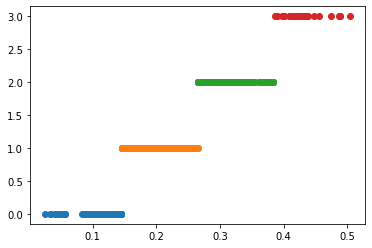

In [7]:
import matplotlib.pyplot as plt
'''for j in range(0, k):
    plt.scatter(d1[d1==j],[j for i in d1[d1==j]])'''
for j in range(0, k):
    plt.plot(data[d1==j], [j for i in d1[d1==j]], 'o')  #j : 0,1,2,3 横坐标为原数值，纵坐标是离散化后的数值

In [68]:
#等频率离散化
w = [1.0*i/k for i in range(k+1)]
w = data.describe(percentiles = w)[4:4+k+1] 
#print(w)
w[0] = w[0]*(1-1e-10)
#print(w)

In [ ]:
data.describe()  //shift+tab

In [45]:
d2 = pd.cut(data, w, labels = range(k))
d2.unique() ##

[0, 3, 2, 1]
Categories (4, int64): [0 < 1 < 2 < 3]

In [70]:
#for j in range(0, k):
   #plt.scatter(data[d2==j],[j for i in d2[d2==j]])

In [54]:
from sklearn.cluster import KMeans 

In [56]:
#data.shape
#data
kmodel = KMeans(n_clusters = k, n_jobs = 4) #建立模型，n_jobs是并行数，一般等于CPU数较好
data1

In [71]:
kmodel.fit(data.values.reshape(data.shape[0] , 1)) #训练模型!!!!

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [92]:
c = pd.DataFrame(kmodel.cluster_centers_)
c = c.sort_values(0)

In [93]:
c

,0
1,0.136954
3,0.220441
0,0.295007
2,0.408679


In [108]:
#w = pd.rolling_mean(c, 2).iloc[1:] #相邻两项求中点，作为边界点
w= c.rolling(2).mean().iloc[1:]
#print(w)
w = [0] + list(w[0]) + [data.max()] #把首末边界点加上
#w

In [109]:
'''cc=c.rolling(2)  #相邻两项
cc.sum()'''

'cc=c.rolling(2)  #相邻两项\ncc.sum()'

In [95]:
d3 = pd.cut(data, w, labels = range(k))

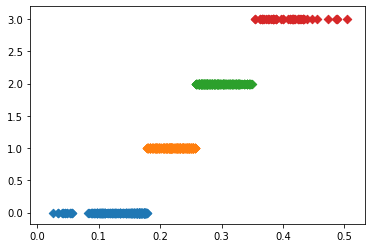

In [119]:
for j in range(0, k):
    plt.scatter(data[d3==j],[j for i in d3[d3==j]],marker='D')

In [ ]:
'''markers = {
‘.’: ‘point’,
‘,’: ‘pixel’,
‘o’: ‘circle’,
‘v’: ‘triangle_down’,
‘^’: ‘triangle_up’,
‘<’: ‘triangle_left’,
‘>’: ‘triangle_right’,
‘1’: ‘tri_down’,
‘2’: ‘tri_up’,
‘3’: ‘tri_left’,
‘4’: ‘tri_right’,
‘8’: ‘octagon’,
‘s’: ‘square’,
‘p’: ‘pentagon’,
'’: ‘star’,
‘h’: ‘hexagon1’,
‘H’: ‘hexagon2’,
‘+’: ‘plus’,
‘x’: ‘x’,
‘D’: ‘diamond’,
‘d’: ‘thin_diamond’,'''


In [66]:
kmodel.cluster_centers_

array([[0.40867925],
       [0.22044101],
       [0.13695417],
       [0.29500712]])

In [ ]:

#引入KMeans
#输出聚类中心，并且排序（默认是随机序的）
w = pd.rolling_mean(c, 2).iloc[1:] #相邻两项求中点，作为边界点
w = [0] + list(w[0]) + [data.max()] #把首末边界点加上
d3 = pd.cut(data, w, labels = range(k))

def cluster_plot(d, k): #自定义作图函数来显示聚类结果
  import matplotlib.pyplot as plt
  plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
  plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
  
  plt.figure(figsize = (8, 3))
  for j in range(0, k):
    plt.plot(data[d==j], [j for i in d[d==j]], 'o')
  
  plt.ylim(-0.5, k-0.5)
  return plt

cluster_plot(d1, k).show()

cluster_plot(d2, k).show()
cluster_plot(d3, k).show()